In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import tifffile as tif
from os import listdir
from os.path import isfile, join
from pathlib import Path
from cellpose import io, models

In [2]:
BASE_PATH = "/bigdata/casus/MLID/Virtual_Staining_Nature_Final/IAV"

In [3]:
def read_tiff(path: str) -> np.ndarray:
    im_stack = tif.imread(path)
    if len(im_stack.shape) == 4:
        im_stack = im_stack[:, 0]

    return im_stack

def get_percentiles(x):
    mi = np.percentile(x, 3, axis=None)
    ma = np.percentile(x, 99.8, axis=None)
    return mi, ma

def read_data(channel):
    paths_w1 = list(Path(BASE_PATH).glob(f"**/*_w{str(channel)}.TIF"))
    print(paths_w1[0])
    exit(0)
    n_sequences = len(paths_w1)
    data = []
    for idx in tqdm(range(n_sequences)):
        w1_path = str(paths_w1[idx])
        w1_ch = np.expand_dims(read_tiff(w1_path), -1) / 65535.0
        data.append(w1_ch)
    data = np.array(data, dtype=np.float32)
    return data

def hist(imgs):
    imgs = (imgs*255).astype(np.uint8)
    unique, counts = np.unique(imgs, return_counts=True)
    all_counts = np.zeros(np.max(unique)+1)
    all_counts[unique] = counts
    
    plt.figure(figsize=(12,12))
    plt.stairs(all_counts)
    plt.yscale('log')
    plt.xlim(0, np.max(unique)+1)

In [4]:
data = read_data(1)
get_percentiles(data)

100%|██████████| 896/896 [00:42<00:00, 21.02it/s]


(0.011017014272511005, 0.21564050018787384)

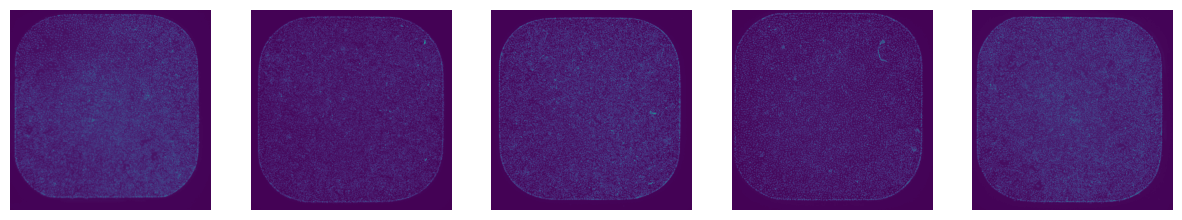

In [5]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(data[i])
    axes[i].axis('off')  

plt.show()

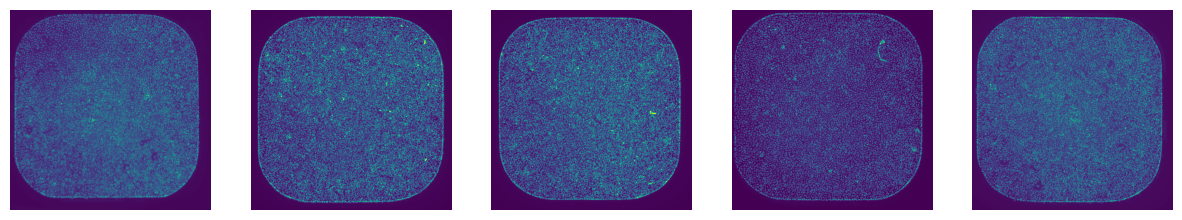

In [9]:
min_p=0.0110
max_p=0.2156

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    d = (data[i] - min_p) / (max_p - min_p)
    d = np.clip(d, 0, 1)
    axes[i].imshow(d)
    axes[i].axis('off')  

plt.show()

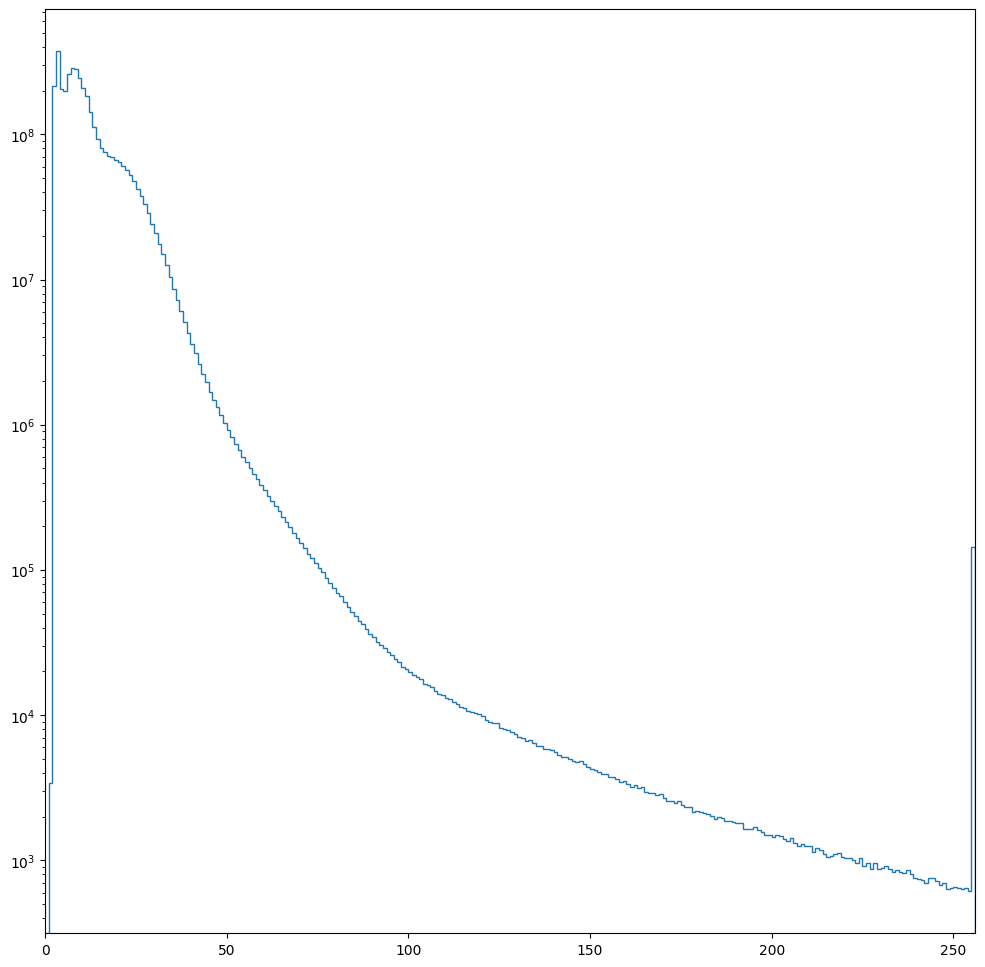

In [7]:
hist(data)

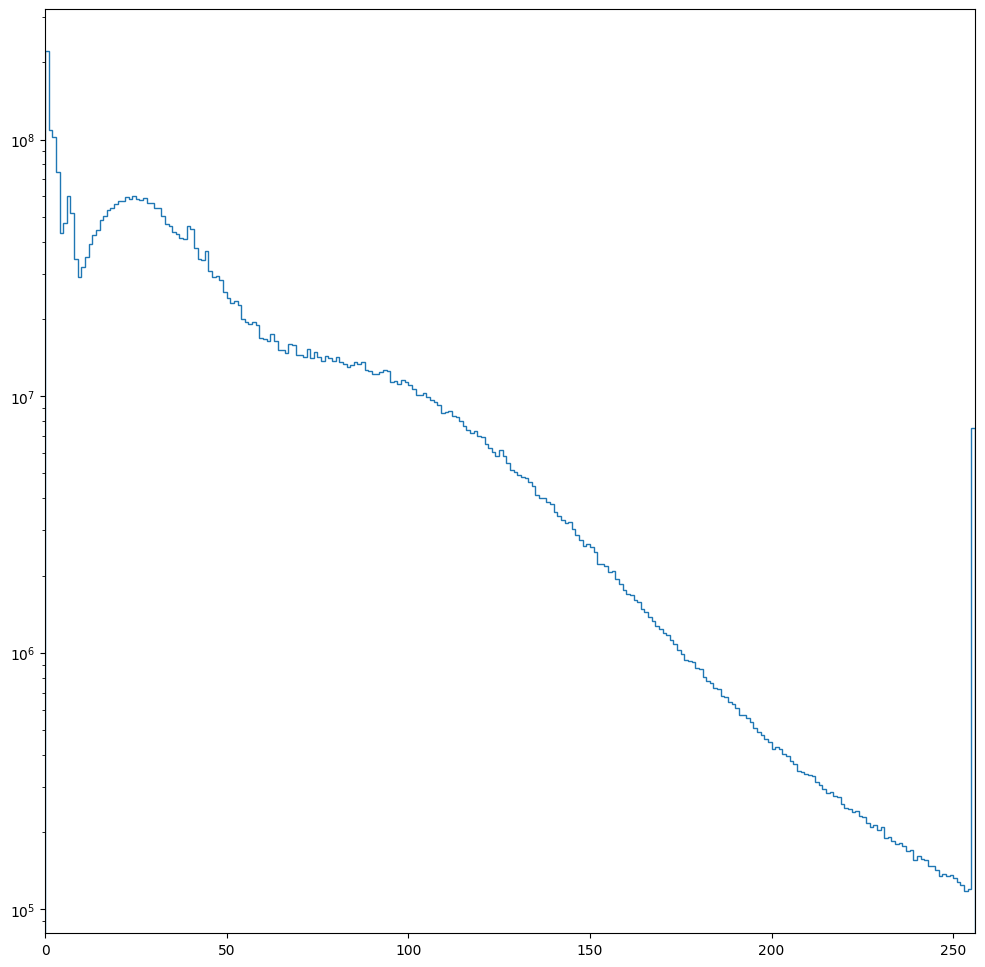

In [10]:
data_norm = (data - min_p) / (max_p - min_p)
data_norm = np.clip(data_norm, 0, 1)
hist(data_norm)

In [11]:
data = read_data(2)
get_percentiles(data)

100%|██████████| 896/896 [00:48<00:00, 18.33it/s]


(0.009094377048313618, 0.1769283562898636)

In [4]:
data = read_data(2)

100%|██████████| 896/896 [00:51<00:00, 17.49it/s]


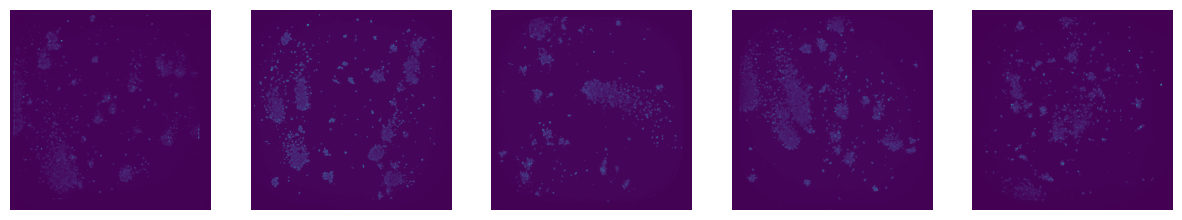

In [12]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(data[i])
    axes[i].axis('off')  

plt.show()

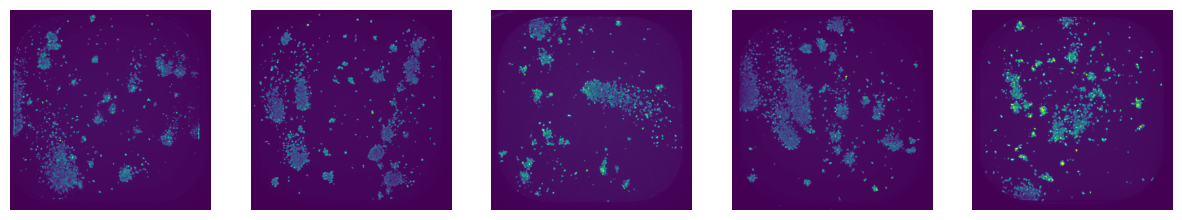

In [5]:
min_p=0.0091
max_p=0.1769

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    d = (data[i] - min_p) / (max_p - min_p)
    d = np.clip(d, 0, 1)
    axes[i].imshow(d)
    axes[i].axis('off')  

plt.show()

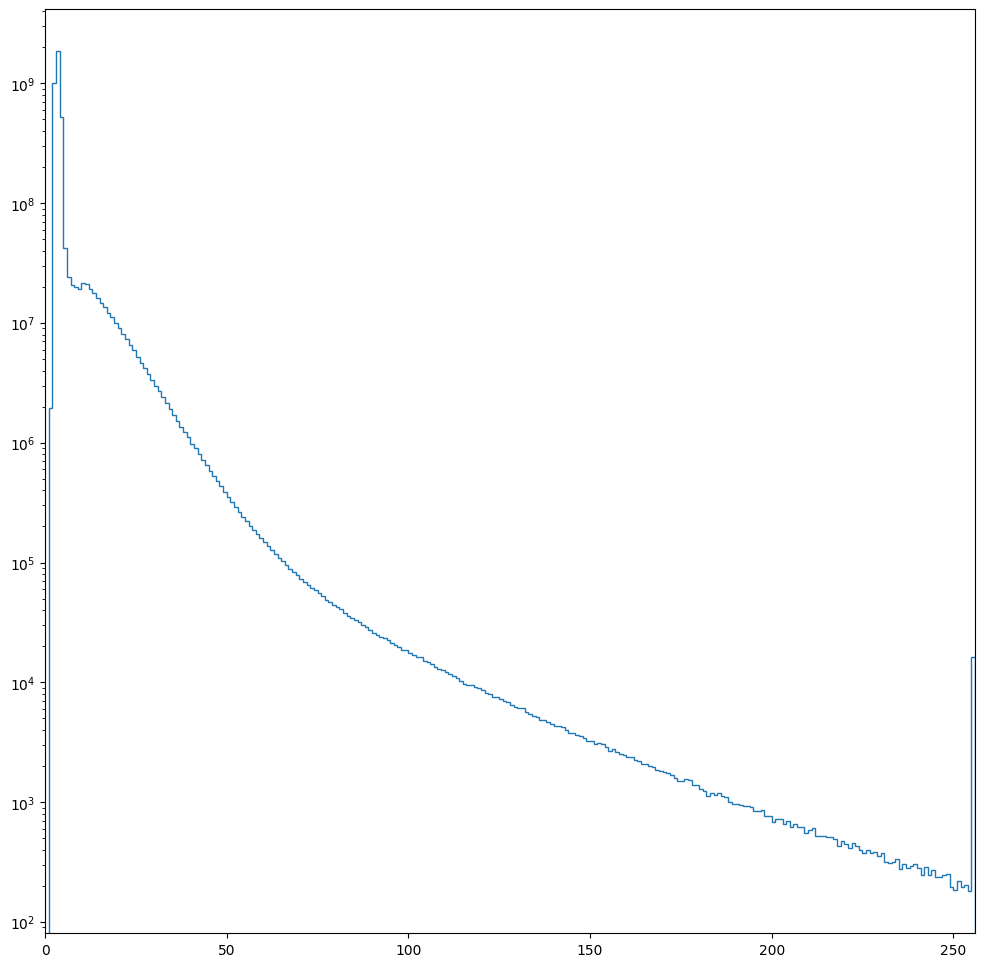

In [14]:
hist(data)

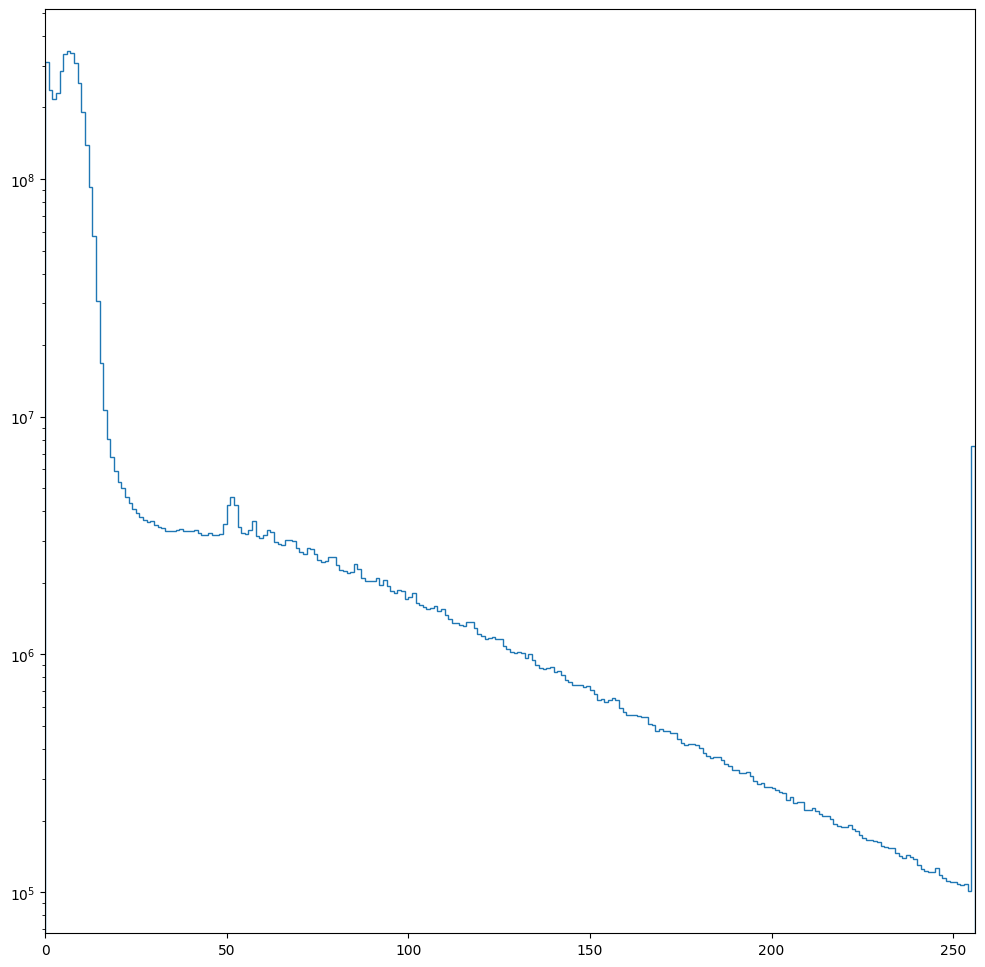

In [6]:
data_norm = (data - min_p) / (max_p - min_p)
data_norm = np.clip(data_norm, 0, 1)
hist(data_norm)

In [7]:
hist(data_norm)

KeyboardInterrupt: 